In [1]:
import math
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
sigmoid(3)

0.9525741268224334

In [4]:
def sigmoid_derivative(x):
    s = 1 / (1 + np.exp(-x))
    return s * (1 - s)

In [5]:
x = np.array([1, 2, 3])
print("Sigmoid derivative ", str(sigmoid_derivative(x)))

Sigmoid derivative  [0.19661193 0.10499359 0.04517666]


In [6]:
def image_vector(img):
    return np.array(img).reshape((img.shape[0] * img.shape[1] * img.shape[2], 1))

In [7]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
image_vector(image)

array([[0.67826139],
       [0.29380381],
       [0.90714982],
       [0.52835647],
       [0.4215251 ],
       [0.45017551],
       [0.92814219],
       [0.96677647],
       [0.85304703],
       [0.52351845],
       [0.19981397],
       [0.27417313],
       [0.60659855],
       [0.00533165],
       [0.10820313],
       [0.49978937],
       [0.34144279],
       [0.94630077]])

### Normalizing Rows

In [8]:
def normalize(x):
    xx = np.linalg.norm(x, axis=1, keepdims=True)
    return x / xx

In [9]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("Normalized ", str(normalize(x)))

Normalized  [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


In [10]:
def softmax(x):
    x_exp = np.exp(x)
    print("X_EXP shape: ", x_exp.shape)
    
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    print("X_SUM shape: ", x_sum.shape)
    
    return x_exp / x_sum ## <- different shapes, but works due to broadcasting

In [11]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("Softmax(x) ", str(softmax(x)))

X_EXP shape:  (2, 5)
X_SUM shape:  (2, 1)
Softmax(x)  [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


### Vectorization

#### Not efficient version:

In [19]:
import time

# DOT PRODUCT IMPLEMENTATION

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]

tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot += x1[i] * x2[i]
toc = time.process_time()
print("Dot ({}) computation:\n ----- {:.10f} ms".format(dot , 1000*(toc - tic)))

# GENERAL DOT PRODUCT

W = np.random.rand(3, len(x1))
tic = time.process_time()
gdot = np.zeros(W.shape[0])

for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i, j] * x1[j]
toc = time.process_time()
print("GDot ({}) computation:\n ----- {:.10f} ms".format(gdot , 1000*(toc - tic)))

Dot (866) computation:
 ----- 0.0000000000 ms
GDot ([68.44863212 57.46639081 71.19097767]) computation:
 ----- 0.0000000000 ms


#### Efficient

In [18]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]

tic = time.process_time()
dot = np.dot(x1, x2)
toc = time.process_time()
print("Dot ({}) computation:\n ----- {:.10f} ms".format(dot , 1000*(toc - tic)))

tic = time.process_time()
gdot = np.dot(W, x2)
toc = time.process_time()
print("GDot ({}) computation:\n ----- {:.10f} ms".format(gdot , 1000*(toc - tic)))

Dot (866) computation:
 ----- 0.0000000000 ms
GDot ([72.24050102 70.09560079 83.56097913]) computation:
 ----- 0.0000000000 ms


#### Loss functions

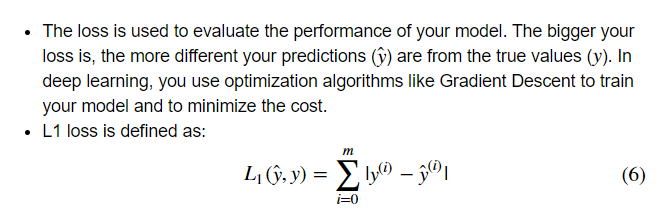

In [20]:
def L1(yhat, y):
    return np.sum(np.abs(y - yhat))

In [21]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))

L1 = 1.1


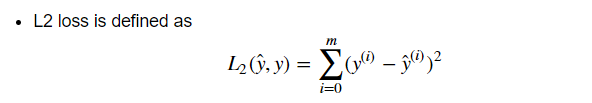

In [24]:
def L2(yhat, y):
    return np.dot((y - yhat), (y - yhat))

In [25]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))

L2 = 0.43
